### Lab -- Data Prep

Welcome to today's lab!  Today we're going to shift our attention to a more demanding dataset -- the restaurants data.  A quarter million rows, dates, and categorical data make this a more interesting, realistic use case of boosting.  

The point of today's lab will be to experiment with different encoding methods and model parameters.

**Step 1:**  Load in your dataset, and declare `X` and `y`.

**Bonus:**  If you would like, encode some of the time based data we created in previous classes.  For now, just try and extract different date parts like month, day, year, etc.  If you do not do this, you should drop the date columns before declaring `X` and `y`.

In [13]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor, plot_tree
import category_encoders as ce

In [14]:
import matplotlib.pyplot as plt
pd.options.plotting.backend = 'plotly'

In [15]:
df = pd.read_csv('/Users/mcs275/dat-class-repo/Homework/Unit2/data/master.csv', parse_dates = ['visit_date'])

In [16]:
df['month'] = df['visit_date'].dt.month

In [17]:
df['year'] = df['visit_date'].dt.year

In [18]:
df = df.fillna(0)

In [47]:
X = df.drop(['visit_date', 'visitors'], axis = 1)
y = df['visitors']

In [20]:
import category_encoders as ce

**Step 2:** Experiment with different encoding methods

Let's do a quick check to see how different encoding methods work out of the box on our dataset.

You're going to repeat the same process for each of `OrdinalEncoder`, `TargetEncoder`, and `OneHotEncoder` and see which one gives you the best results on our data.

**2a:** Use an `OrdinalEncoder` to transform your training set with the `fit_transform` method.

If you are confused about how the transformation is happening, try using the `mapping()` method on your category encoder to get a hang of what's going on.

In [9]:
X

,id,day_of_week,holiday,genre,area,latitude,longitude,reserve_visitors,month,year
0,air_ba937bf13d40fb24,Wednesday,0,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,0.0,1,2016
1,air_ba937bf13d40fb24,Thursday,0,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,0.0,1,2016
2,air_ba937bf13d40fb24,Friday,0,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,0.0,1,2016
3,air_ba937bf13d40fb24,Saturday,0,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,0.0,1,2016
4,air_ba937bf13d40fb24,Monday,0,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,0.0,1,2016
...,...,...,...,...,...,...,...,...,...,...
252103,air_a17f0778617c76e2,Friday,0,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852,6.0,4,2017
252104,air_a17f0778617c76e2,Saturday,0,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852,37.0,4,2017
252105,air_a17f0778617c76e2,Sunday,0,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852,35.0,3,2017
252106,air_a17f0778617c76e2,Monday,1,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852,3.0,3,2017


In [35]:
ore = ce.OrdinalEncoder()
X1 = ore.fit_transform(X)

In [36]:
ore.mapping

[{'col': 'id',
  'mapping': air_ba937bf13d40fb24      1
  air_25e9888d30b386df      2
  air_fd6aac1043520e83      3
  air_64d4491ad8cdb1c6      4
  air_ee3a01f0c71a769f      5
                         ... 
  air_cf5ab75a0afb8af9    826
  air_1c0b150f9e696a5f    827
  air_900d755ebd2f7bbd    828
  air_a17f0778617c76e2    829
  NaN                      -2
  Length: 830, dtype: int64,
  'data_type': dtype('O')},
 {'col': 'calendar_date',
  'mapping': 2016-01-13      1
  2016-01-14      2
  2016-01-15      3
  2016-01-16      4
  2016-01-18      5
               ... 
  2016-01-01    475
  2016-01-03    476
  2017-01-02    477
  2016-01-02    478
  NaN            -2
  Length: 479, dtype: int64,
  'data_type': dtype('O')},
 {'col': 'day_of_week',
  'mapping': Wednesday    1
  Thursday     2
  Friday       3
  Saturday     4
  Monday       5
  Tuesday      6
  Sunday       7
  NaN         -2
  dtype: int64,
  'data_type': dtype('O')},
 {'col': 'genre',
  'mapping': Dining bar                 

**2b:** Initialize a `DecisionTreeRegressor` with a `max_depth` set to 5, check the model score to see how it performed using the `score` method.

In [37]:
tree = DecisionTreeRegressor(max_depth = 3)
tree.fit(X1, y)
tree.score(X1, y)

0.044156862264541186

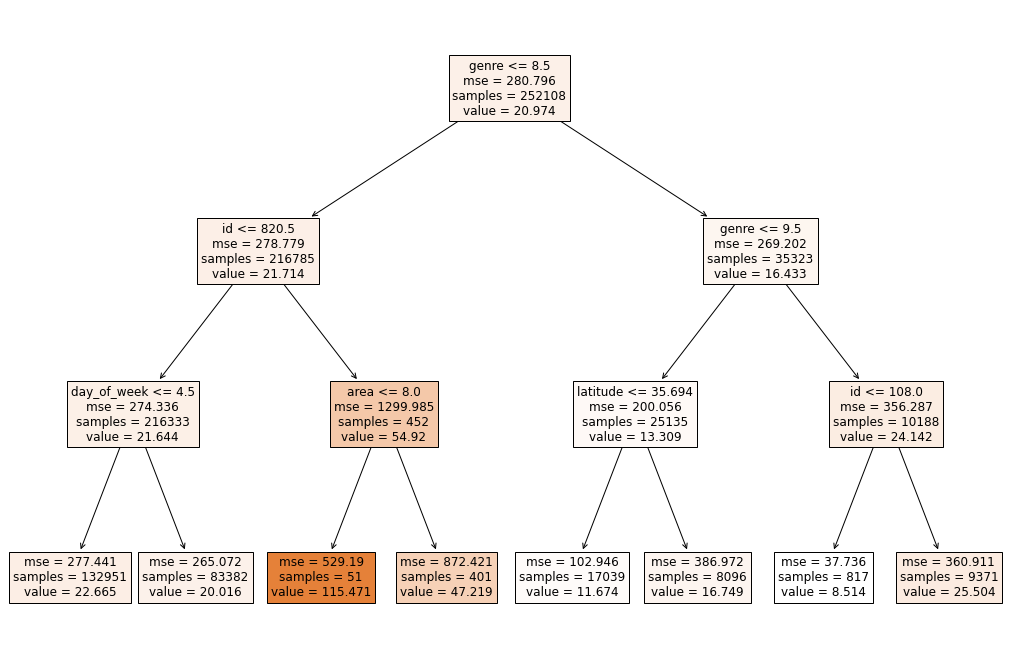

In [29]:
plt.figure(figsize = (18, 12))
plot_tree(tree, fontsize = 12, filled=True, feature_names = X.columns);

**2c:** Repeat these same steps for the `TargetEncoder` and the `OneHotEncoder`

**Important:** The `OneHotEncoder` can take awhile to fit.  If nothing happens in around 4 minutes, just cancel the process and try it again later on when you have more time.

In [23]:
ohe = ce.OneHotEncoder()

In [38]:
# your code here
ohe = ce.OneHotEncoder()
X2  = ohe.fit_transform(X)
tree.fit(X2, y)
tree.score(X2, y)

0.05552937733848129

In [40]:
te = ce.TargetEncoder()

In [48]:
X3 = te.fit_transform(X, y)

In [49]:
tree = DecisionTreeRegressor(max_depth = 3)
tree.fit(X3, y)

DecisionTreeRegressor(max_depth=3)

In [50]:
tree.score(X3, y)

0.4232506055497004

**Step 3:** Look at your most important features

Similar to the previous lab, take your model's most important features and load them into a dataframe to see what's driving your results.

In [51]:
# your code here
feats = pd.DataFrame({
    'Columns': X3.columns,
    'Importance': tree.feature_importances_
}).sort_values(by = 'Importance', ascending = False)

feats

,Columns,Importance
0,id,0.887216
1,calendar_date,0.112784
2,day_of_week,0.000000
3,holiday,0.000000
4,genre,0.000000
5,area,0.000000
6,latitude,0.000000
7,longitude,0.000000
8,reserve_visitors,0.000000
9,month,0.000000


**Step 4:** Using the pipeline that was discussed in class, try and do the following:
 
 - Create a pipeline for the encoder that worked best for the previous step, and a decision tree with the same parameters that were used previously

 - Create an in-sample and out-of-sample portion for your dataset.  The in sample portion will be all rows for each restaurant for the dataset, up until the last 15.  The out-of-sample portion of your data will be the last 15 days for each restaurant.  (This same task was completed in an earlier lab, so feel free to use that as a reference if you're not sure how to do this).
 
 - Fit your model on the training set, and then score it on the test set.  Note how the two different values differ.

In [55]:
from sklearn.pipeline import make_pipeline
tree = DecisionTreeRegressor(max_depth = 5)
pipe = make_pipeline(te, tree)


In [58]:
train = df.groupby('id').apply(lambda x: x.iloc[:-15])
test  = df.groupby('id').apply(lambda x: x.iloc[-15:])

In [60]:
X_train = train.drop(['visit_date','visitors'], axis=1)
y_train = train['visitors']
# and for the test set
X_test = test.drop(['visit_date', 'visitors'], axis = 1)
y_test = test['visitors']

In [61]:
# make our pipeline
pipe = make_pipeline(te, tree)

# fit on the in-sample data
pipe.fit(X_train, y_train)

# score on the out of sample data
pipe.score(X_test, y_test)

0.36944094661425686

In [62]:
pipe

Pipeline(steps=[('targetencoder',
                 TargetEncoder(cols=['id', 'calendar_date', 'day_of_week',
                                     'genre', 'area'])),
                ('decisiontreeregressor', DecisionTreeRegressor(max_depth=5))])